<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [16]:
# load the csv file
df = pd.read_csv('Life_Expectancy.csv')
# type your code here
cols = list(df.columns)
df.columns=[col.strip() for col in cols]
df = df.set_index('Country')

df = pd.get_dummies(df, columns=['Status'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
Adult_Mortality      124 non-null int64
Infant_Deaths        124 non-null int64
Hepatitis            124 non-null int64
Measles              124 non-null int64
BMI                  124 non-null float64
Underfive_Deaths     124 non-null int64
Polio                124 non-null int64
Diphtheria           124 non-null int64
HIV                  124 non-null float64
GDP                  124 non-null float64
Population           124 non-null int64
Malnourished10_19    124 non-null float64
Malnourished5_9      124 non-null float64
Income_Index         124 non-null float64
Schooling            124 non-null float64
Expected             124 non-null float64
Status_Developing    124 non-null uint8
dtypes: float64(8), int64(8), uint8(1)
memory usage: 16.6+ KB


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

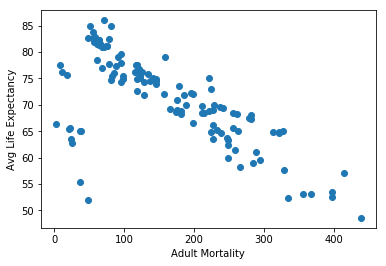

In [8]:
# type your code here
plt.scatter('Adult_Mortality','Expected', data=df)
plt.xlabel('Adult Mortality')
plt.ylabel('Avg Life Expectancy')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
y = df['Expected']
X = df['Income_Index']

import statsmodels.api as sm
Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        16:24:34   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
residuals = model.resid
print('Expected Error Value: ', residuals.mean())

Expected Error Value:  -1.4210854715202004e-14


<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here

y = df['Expected']
X = df[['Polio' , 'Diphtheria', 'Hepatitis']]

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           0.000468
Time:                        16:30:44   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.9881      3.524     16.453      0.000      51.010      64.966
Polio          0.0910      0.043      2.099      0.038       0.005       0.177
Diphtheria     0.1613      0.082      1.969      0.051      -0.001       0.323
Hepatitis     -0.1037      0.068     -1.528      0.129      -0.238       0.031
==============================================================================
Omnibus:                        4.513   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                4.279
Skew:                          -0.396   Prob(JB):                        0.118
Kurtosis:                       2.550   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# type your code here

y = df['Expected']
X = df[['Polio' , 'Status_Developing']]

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     27.90
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.09e-10
Time:                        16:39:17   Log-Likelihood:                -416.83
No. Observations:                 124   AIC:                             839.7
Df Residuals:                     121   BIC:                             848.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.6009      3.256     21.988      0.000      65.154      78.048
Polio                 0.1008      0.030      3.382      0.001       0.042       0.160
Status_Developing   -10.7587      1.784     -6.030      0.000     -14.291      -7.227
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.859
Skew:                          -0.372   Prob(JB):                        0.239
Kurtosis:                       3.024   Cond. No.                         487.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here
y = df['Expected']
X = df.drop('Expected', axis=1)

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.94e-36
Time:                        16:48:48   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality      -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths         0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis             0.0656      0.032      2.056      0.042       0.002       0.129
Measles            -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths     -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria           -0.0345      0.040     -0.868      0.387      -0.113       0.044
HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population        -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19    -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9       0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index         18.6518      6.313      2.955      0.004       6.138      31.166
Schooling             0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing    -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
### Backward Elimination
cols = list(Xc.columns)

while len(cols)>1:
    X1 = Xc[cols]
    model = sm.OLS(y, X1).fit()
    pvalues = model.pvalues
    pvalues = pvalues.drop('const')
    max_p = max(pvalues)
    feature_maxp = pvalues.idxmax()
    if max_p>0.05:
        cols.remove(feature_maxp)
        print(feature_maxp, max_p)
    else:
        break
        
selected_features=cols
print(cols)

Polio 0.6773527493357714
Measles 0.3457409455856453
Malnourished5_9 0.48054865417631454
Schooling 0.36919562422612306
BMI 0.24514780048475715
Diphtheria 0.24544239053019876
Infant_Deaths 0.20549102659782917
Underfive_Deaths 0.6435739505555209
Malnourished10_19 0.21989585936317393
GDP 0.1668776168581984
['const', 'Adult_Mortality', 'Hepatitis', 'HIV', 'Population', 'Income_Index', 'Status_Developing']


In [37]:
cols=['const', 'Adult_Mortality', 'Hepatitis', 'HIV', 'Population', 'Income_Index', 'Status_Developing']

In [24]:
Xc = Xc[cols]

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.20e-43
Time:                        16:52:09   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here

y = df['Expected']
X = df[['GDP' , 'Income_Index']]

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     150.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.44e-33
Time:                        17:00:49   Log-Likelihood:                -362.85
No. Observations:                 124   AIC:                             731.7
Df Residuals:                     121   BIC:                             740.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6132      1.865     22.848      0.000      38.921      46.306
GDP           4.515e-05   4.36e-05      1.034      0.303   -4.13e-05       0.000
Income_Index    40.9705      2.823     14.512      0.000      35.381      46.560
==============================================================================
Omnibus:                        9.157   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               16.954
Skew:                           0.232   Prob(JB):                     0.000208
Kurtosis:                       4.751   Cond. No.                     1.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:

y = df['Expected']
X = df[['Income_Index']]

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        17:01:24   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y_pred = model.predict(Xc)
variance = ((y-y_pred)**2).mean()

print('Variance of errors between y and y_pred: ', variance)

Variance of errors between y and y_pred:  20.56116776979112


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here

y = df['Expected']
X = df[['Income_Index']]

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        17:06:37   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here

y = df['Expected']
X = df[['Adult_Mortality']]

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.27e-20
Time:                        17:14:42   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
y = df['Expected']
X = df[['Adult_Mortality', 'Population']]

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     62.12
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.74e-19
Time:                        17:15:36   Log-Likelihood:                -396.54
No. Observations:                 124   AIC:                             799.1
Df Residuals:                     121   BIC:                             807.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.6129      1.023     78.783      0.000      78.587      82.639
Adult_Mortality    -0.0594      0.005    -11.133      0.000      -0.070      -0.049
Population       7.436e-09   1.33e-08      0.561      0.576   -1.88e-08    3.37e-08
==============================================================================
Omnibus:                       57.763   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.344
Skew:                          -1.826   Prob(JB):                     9.22e-36
Kurtosis:                       7.231   Cond. No.                     8.61e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# type your code here

y = df['Expected']
X = df.drop('Expected', axis=1)

Xc = sm.add_constant(X)

Xc = Xc[cols]  ## keeping only significant variables

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.20e-43
Time:                        17:20:20   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# type your code here

y = df['Expected']
X = df.drop('Expected', axis=1)

Xc = sm.add_constant(X)

Xc = Xc[cols]  ## keeping only significant variables

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.20e-43
Time:                        17:24:15   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

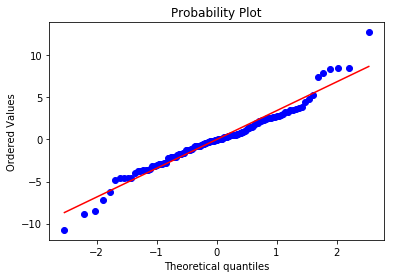

In [40]:
residuals = model.resid

import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.show()

In [41]:
## Jarque-Berra Test

print(stats.jarque_bera(residuals))

(21.17076346690786, 2.5282913820201536e-05)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
y = df['Expected']
X = df.drop('Expected', axis=1)

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc[cols]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           3.20e-43
Time:                        17:31:59   Log-Likelihood:                -329.08
No. Observations:                 124   AIC:                             672.2
Df Residuals:                     117   BIC:                             691.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.9027      3.005     19.603      0.000      52.952      64.853
Adult_Mortality      -0.0235      0.004     -5.950      0.000      -0.031      -0.016
Hepatitis             0.0353      0.016      2.237      0.027       0.004       0.067
HIV                  -1.0942      0.252     -4.342      0.000      -1.593      -0.595
Population        -1.698e-08    8.1e-09     -2.096      0.038    -3.3e-08   -9.36e-10
Income_Index         24.0067      3.117      7.701      0.000      17.833      30.181
Status_Developing    -2.6723      1.077     -2.481      0.015      -4.806      -0.539
==============================================================================
Omnibus:                       10.733   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               21.171
Skew:                           0.288   Prob(JB):                     2.53e-05
Kurtosis:                       4.941   Cond. No.                     6.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# type your code here
y = df['Expected']
X = df.drop('Expected', axis=1)

X['status_gdp']=X['GDP']*X['Status_Developing']

Xc = sm.add_constant(X)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.14e-36
Time:                        17:33:05   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.5466      3.925     15.935      0.000      54.765      70.328
Adult_Mortality      -0.0228      0.004     -5.680      0.000      -0.031      -0.015
Infant_Deaths         0.0564      0.036      1.547      0.125      -0.016       0.129
Hepatitis             0.0715      0.032      2.259      0.026       0.009       0.134
Measles           -5.287e-05   6.03e-05     -0.877      0.382      -0.000    6.66e-05
BMI                  -0.0291      0.022     -1.306      0.194      -0.073       0.015
Underfive_Deaths     -0.0401      0.027     -1.497      0.137      -0.093       0.013
Polio                -0.0056      0.022     -0.258      0.797      -0.049       0.037
Diphtheria           -0.0446      0.040     -1.124      0.264      -0.123       0.034
HIV                  -1.0748      0.265     -4.054      0.000      -1.600      -0.549
GDP               -7.939e-06    4.6e-05     -0.173      0.863   -9.91e-05    8.32e-05
Population        -1.612e-08   8.58e-09     -1.878      0.063   -3.31e-08    8.96e-10
Malnourished10_19    -0.4757      0.297     -1.604      0.112      -1.064       0.112
Malnourished5_9       0.2995      0.280      1.071      0.287      -0.255       0.854
Income_Index         15.9884      6.392      2.501      0.014       3.315      28.662
Schooling             0.4188      0.343      1.220      0.225      -0.262       1.099
Status_Developing    -3.8250      1.489     -2.569      0.012      -6.777      -0.873
status_gdp            0.0001    6.8e-05      1.902      0.060    -5.5e-06       0.000
==============================================================================
Omnibus:                        4.411   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.490
Skew:                           0.109   Prob(JB):                       0.0642
Kurtosis:                       4.008   Cond. No.                     9.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
### Backward Elimination
cols = list(Xc.columns)

while len(cols)>1:
    X1 = Xc[cols]
    model = sm.OLS(y, X1).fit()
    pvalues = model.pvalues
    pvalues = pvalues.drop('const')
    max_p = max(pvalues)
    feature_maxp = pvalues.idxmax()
    if max_p>0.05:
        cols.remove(feature_maxp)
        print(feature_maxp, max_p)
    else:
        break
        
selected_features=cols
print(cols)

GDP 0.8632472088747609
Polio 0.7936591842825421
Measles 0.38703463975867136
Malnourished5_9 0.43443138480395393
Schooling 0.2871916995126173
BMI 0.20473005246092837
Malnourished10_19 0.18559413647169934
Infant_Deaths 0.3397338820045783
Underfive_Deaths 0.33539821709691164
Diphtheria 0.19674764934168226
Population 0.05051444702433638
['const', 'Adult_Mortality', 'Hepatitis', 'HIV', 'Income_Index', 'Status_Developing', 'status_gdp']


In [51]:
cols2 = ['const', 'Adult_Mortality', 'Hepatitis', 'HIV', 'Income_Index', 'Status_Developing', 'status_gdp']

In [52]:
model = sm.OLS(y, Xc[cols2]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     98.72
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           2.07e-43
Time:                        17:35:02   Log-Likelihood:                -328.62
No. Observations:                 124   AIC:                             671.2
Df Residuals:                     117   BIC:                             691.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                62.7917      3.237     19.400      0.000      56.382      69.202
Adult_Mortality      -0.0244      0.004     -6.281      0.000      -0.032      -0.017
Hepatitis             0.0364      0.016      2.314      0.022       0.005       0.068
HIV                  -1.1482      0.254     -4.527      0.000      -1.650      -0.646
Income_Index         19.3846      3.443      5.630      0.000      12.566      26.203
Status_Developing    -4.4000      1.236     -3.559      0.001      -6.849      -1.951
status_gdp            0.0001   5.02e-05      2.303      0.023    1.62e-05       0.000
==============================================================================
Omnibus:                        3.626   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                4.016
Skew:                           0.104   Prob(JB):                        0.134
Kurtosis:                       3.857   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
# type your code here

y = df['Expected']
X = df.drop('Expected', axis=1)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     940.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          4.84e-108
Time:                        17:41:43   Log-Likelihood:                -399.28
No. Observations:                 124   AIC:                             830.6
Df Residuals:                     108   BIC:                             875.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Adult_Mortality      -0.0069      0.007     -0.960      0.339      -0.021       0.007
Infant_Deaths        -0.0807      0.066     -1.224      0.223      -0.211       0.050
Hepatitis             0.0305      0.058      0.523      0.602      -0.085       0.146
Measles              -0.0002      0.000     -1.516      0.133      -0.000    5.18e-05
BMI                  -0.0697      0.041     -1.696      0.093      -0.151       0.012
Underfive_Deaths      0.0712      0.048      1.482      0.141      -0.024       0.166
Polio                 0.0180      0.040      0.449      0.654      -0.061       0.097
Diphtheria            0.0388      0.073      0.535      0.593      -0.105       0.183
HIV                   0.5728      0.455      1.258      0.211      -0.330       1.475
GDP               -3.684e-05    6.3e-05     -0.585      0.560      -0.000    8.81e-05
Population        -1.747e-08   1.58e-08     -1.107      0.271   -4.87e-08    1.38e-08
Malnourished10_19    -1.1120      0.546     -2.035      0.044      -2.195      -0.029
Malnourished5_9       1.6540      0.496      3.334      0.001       0.671       2.637
Income_Index         43.2384     11.241      3.846      0.000      20.956      65.520
Schooling             2.1667      0.601      3.608      0.000       0.976       3.357
Status_Developing     7.8535      1.821      4.313      0.000       4.244      11.463
==============================================================================
Omnibus:                        7.813   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.565
Skew:                           0.588   Prob(JB):                       0.0228
Kurtosis:                       3.282   Cond. No.                     8.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [15]:
# load the csv file
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here